In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
# Menentukan folder untuk menyimpan log TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Membuat callback TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
# Augmentasi untuk generator pelatihan, augmentasi ini dilakukan karena terjadi overfitting jika menggunakan image asli sehingga perlu menambah data dengan cara augmentasi
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmentasi untuk generator validasi (tanpa augmentasi)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Membuat generator training
train_generator = train_datagen.flow_from_directory(
    'padangTraining',
    batch_size=30,
    target_size=(150, 150),
    class_mode='categorical',  # Klasifikasi multi-kelas
    shuffle=True
)

# Membuat generator validasi
validation_generator = validation_datagen.flow_from_directory(
    'padangTesting',
    batch_size=30,
    target_size=(150, 150),
    class_mode='categorical',  # Klasifikasi multi-kelas
    shuffle=False
)

Found 439 images belonging to 5 classes.
Found 96 images belonging to 5 classes.


In [31]:
# Menargetkan class
labels_2 = ['AyamGoreng', 'AyamPop', 'dagingRendang', 'gulaiTunjang', 'telurBalado']

In [32]:
# membuat model 

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Tambahkan lapisan Dropout di sini dengan tingkat dropout 0.5
    tf.keras.layers.Dense(5, activation='softmax')
])


In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dense_8 (Dense)             (None, 36, 36, 128)       8320      
                                                                 
 flatten_4 (Flatten)         (None, 165888)           

In [34]:
# Compile a Model
model.compile(
   loss = 'categorical_crossentropy',
   optimizer='Adam',
   metrics=['acc']
)

# Train the model

history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback],
)

Epoch 1/15
15/15 [==============================] - 6s 367ms/step - loss: 1.7772 - acc: 0.2847 - val_loss: 1.4452 - val_acc: 0.4167
Epoch 2/15
15/15 [==============================] - 5s 350ms/step - loss: 1.1463 - acc: 0.5285 - val_loss: 0.9911 - val_acc: 0.5000
Epoch 3/15
15/15 [==============================] - 6s 366ms/step - loss: 1.0532 - acc: 0.5558 - val_loss: 0.8702 - val_acc: 0.6562
Epoch 4/15
15/15 [==============================] - 5s 353ms/step - loss: 0.8245 - acc: 0.6629 - val_loss: 1.0060 - val_acc: 0.5938
Epoch 5/15
15/15 [==============================] - 5s 356ms/step - loss: 0.9308 - acc: 0.6492 - val_loss: 0.8090 - val_acc: 0.7083
Epoch 6/15
15/15 [==============================] - 7s 449ms/step - loss: 0.8167 - acc: 0.6401 - val_loss: 0.7728 - val_acc: 0.7188
Epoch 7/15
15/15 [==============================] - 7s 454ms/step - loss: 0.7110 - acc: 0.7153 - val_loss: 0.5861 - val_acc: 0.7708
Epoch 8/15
15/15 [==============================] - 7s 478ms/step - loss: 0.

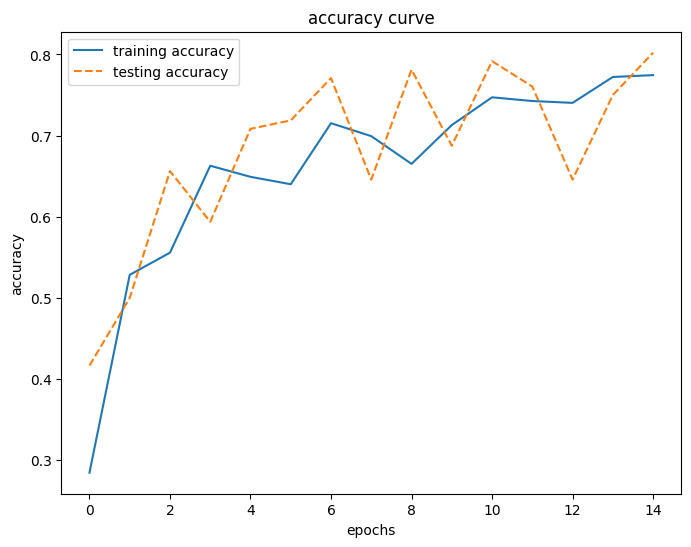

In [35]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'] if 'accuracy' in history.history else history.history['acc'])
plt.plot(history.history['val_accuracy'] if 'val_accuracy' in history.history else history.history['val_acc'], ls='--')
plt.legend(['training accuracy', 'testing accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy curve')
plt.show()


In [36]:
model.evaluate(validation_generator)


4/4 [==============================] - 0s 104ms/step - loss: 0.5418 - acc: 0.8021


[0.5418153405189514, 0.8020833134651184]

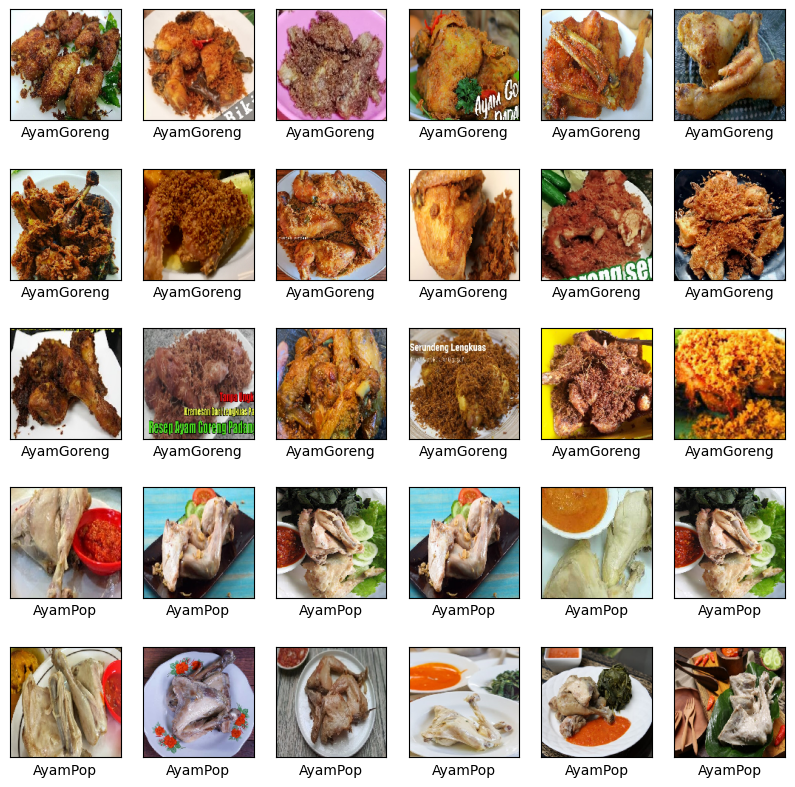

In [37]:
i = 0

batch_size = validation_generator.batch_size

if i < len(validation_generator):
    batch_images, batch_labels = validation_generator[i]
    plt.figure(figsize=(10,10))
    for idx in range(batch_size):
        plt.subplot(5, 6, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch_images[idx])
        class_index = np.argmax(batch_labels[idx])
        class_name = labels_2[class_index]
        plt.xlabel(class_name)

        if idx >= batch_size - 1:
            break
else:
    print("invalid batch index !")

In [38]:
model.save('padang.h5')
print("Saved model to disk")

Saved model to disk


/home/ardian/Dokumen/PrakAI_new/env/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
%load_ext tensorboard
%tensorboard --logdir=./logs